<a href="https://colab.research.google.com/github/MoralesCMaJo/Tarea-2--An-lisis-de-series-temporales/blob/main/8_The_ARIMA_and_SARIMAX_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas yfinance matplotlib numpy

In [ ]:
#Importando los paquetes relevantes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts
import seaborn as sns
sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import shutil

# Ruta del archivo en Google Drive
ruta_drive = "/content/drive/My Drive/Index_2023.csv"

# Ruta de destino en Google Colab
ruta_colab = "/content/Index_2023.csv"

# Copia el archivo desde Google Drive a Google Colab
shutil.copy(ruta_drive, ruta_colab)#Importación de datos y preprocesamiento
raw_csv_data = pd.read_csv("Index_2023.csv")
df_comp = raw_csv_data.copy()
df_comp['Date'] = pd.to_datetime(df_comp['Date'], format='%Y-%m-%d', dayfirst=True)
df_comp.set_index("Date", inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.ffill()
df_comp['market_value']=df_comp.ftse
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import chi2

In [ ]:
# Función de prueba de razón de verosimilitud (LLR)
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = 2 * (L2 - L1)
    p = chi2.sf(LR, DF).round(3)
    return p

In [ ]:
# Creación de retornos
df['returns'] = df['market_value'].pct_change(1) * 100

<ipython-input-14-46e93ab11afd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns'] = df['market_value'].pct_change(1) * 100


In [ ]:
# Modelo ARIMA(1,1,1)
model_ar_1_i_1_ma_1 = sm.tsa.ARIMA(df['market_value'], order=(1, 1, 1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
print(results_ar_1_i_1_ma_1.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6200
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -34020.745
Date:                Sun, 15 Oct 2023   AIC                          68047.491
Time:                        00:01:23   BIC                          68067.687
Sample:                    01-07-1994   HQIC                         68054.493
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8293      0.042     19.867      0.000       0.748       0.911
ma.L1         -0.8644      0.037    -23.226      0.000      -0.937      -0.791
sigma2      3423.1174     36.794     93.035      0.0

<ipython-input-26-0b0c2909d13e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid


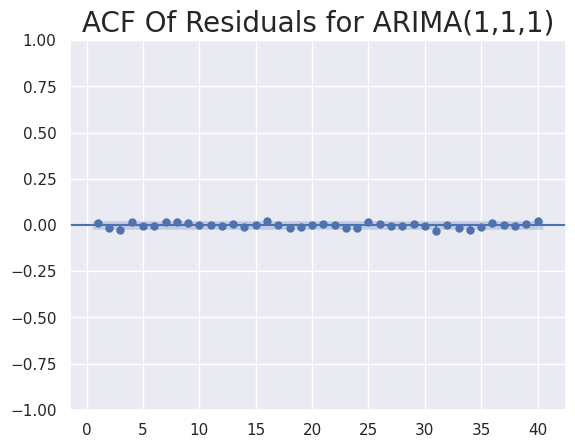

In [ ]:
# Residuales del ARIMA(1,1,1)
df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid
sgt.plot_acf(df['res_ar_1_i_1_ma_1'], zero=False, lags=40)
plt.title("ACF Of Residuals for ARIMA(1,1,1)", size=20)
plt.show()

<ipython-input-27-c9024a904c87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid


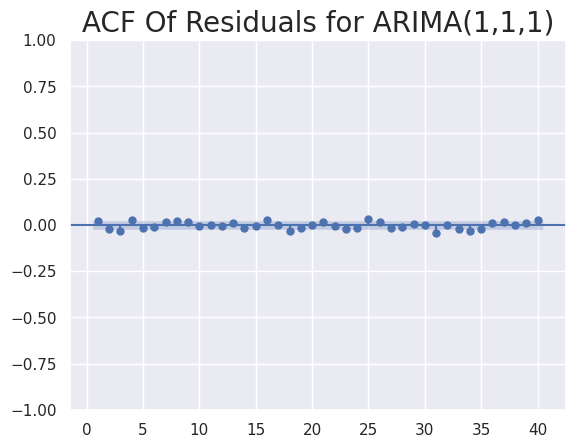

In [ ]:
df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid
sgt.plot_acf(df['res_ar_1_i_1_ma_1'][1:], zero=False, lags=40)
plt.title("ACF Of Residuals for ARIMA(1,1,1)", size=20)
plt.show()


In [ ]:
# Modelos ARIMA con diferentes órdenes
model_ar_1_i_1_ma_2 = sm.tsa.ARIMA(df['market_value'], order=(1, 1, 2))
results_ar_1_i_1_ma_2 = model_ar_1_i_1_ma_2.fit()

model_ar_1_i_1_ma_3 = sm.tsa.ARIMA(df['market_value'], order=(1, 1, 3))
results_ar_1_i_1_ma_3 = model_ar_1_i_1_ma_3.fit()

model_ar_2_i_1_ma_1 = sm.tsa.ARIMA(df['market_value'], order=(2, 1, 1))
results_ar_2_i_1_ma_1 = model_ar_2_i_1_ma_1.fit()

model_ar_3_i_1_ma_1 = sm.tsa.ARIMA(df['market_value'], order=(3, 1, 1))
results_ar_3_i_1_ma_1 = model_ar_3_i_1_ma_1.fit()

model_ar_3_i_1_ma_2 = sm.tsa.ARIMA(df['market_value'], order=(3, 1, 2))
results_ar_3_i_1_ma_2 = model_ar_3_i_1_ma_2.fit()

print("ARIMA(1,1,1):  \t LL = ", results_ar_1_i_1_ma_1.llf, "\t AIC = ", results_ar_1_i_1_ma_1.aic)
print("ARIMA(1,1,2):  \t LL = ", results_ar_1_i_1_ma_2.llf, "\t AIC = ", results_ar_1_i_1_ma_2.aic)
print("ARIMA(1,1,3):  \t LL = ", results_ar_1_i_1_ma_3.llf, "\t AIC = ", results_ar_1_i_1_ma_3.aic)
print("ARIMA(2,1,1):  \t LL = ", results_ar_2_i_1_ma_1.llf, "\t AIC = ", results_ar_2_i_1_ma_1.aic)
print("ARIMA(3,1,1):  \t LL = ", results_ar_3_i_1_ma_1.llf, "\t AIC = ", results_ar_3_i_1_ma_1.aic)
print("ARIMA(3,1,2):  \t LL = ", results_ar_3_i_1_ma_2.llf, "\t AIC = ", results_ar_3_i_1_ma_2.aic)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1,1,1):  	 LL =  -34020.74533877311 	 AIC =  68047.49067754622
ARIMA(1,1,2):  	 LL =  -34016.705228529216 	 AIC =  68041.41045705843
ARIMA(1,1,3):  	 LL =  -34014.00312782079 	 AIC =  68038.00625564158
ARIMA(2,1,1):  	 LL =  -34016.54713736105 	 AIC =  68041.0942747221
ARIMA(3,1,1):  	 LL =  -34015.49626654049 	 AIC =  68040.99253308098
ARIMA(3,1,2):  	 LL =  -34013.89882734741 	 AIC =  68039.79765469482


In [ ]:
# Prueba de razón de verosimilitud LLR
llf_model_1_i_1_ma_2 = results_ar_1_i_1_ma_2.llf
llf_model_1_i_1_ma_3 = results_ar_1_i_1_ma_3.llf

df_model_1_i_1_ma_2 = results_ar_1_i_1_ma_2.df_model
df_model_1_i_1_ma_3 = results_ar_1_i_1_ma_3.df_model

lr_statistic = -2 * (llf_model_1_i_1_ma_2 - llf_model_1_i_1_ma_3)
p_value = chi2.sf(lr_statistic, df_model_1_i_1_ma_3 - df_model_1_i_1_ma_2)

print("\nLLR test p-value = " + str(p_value))



LLR test p-value = 0.020088337284099107


In [ ]:
# Prueba de razón de verosimilitud LLR con DF = 2
df_model_1_i_1_ma_1 = results_ar_1_i_1_ma_1.df_model
df_model_1_i_1_ma_3 = results_ar_1_i_1_ma_3.df_model
lr_statistic = -2 * (results_ar_1_i_1_ma_1.llf - results_ar_1_i_1_ma_3.llf)
p_value = chi2.sf(lr_statistic, 2)

print("\nLLR test p-value = " + str(p_value))


LLR test p-value = 0.0011800352685875642


<ipython-input-36-8137f614fdd3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_ar_1_i_1_ma_3'] = results_ar_1_i_1_ma_3.resid


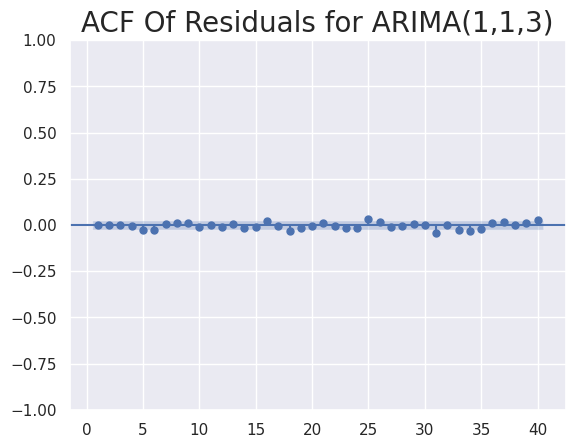

In [ ]:
df['res_ar_1_i_1_ma_3'] = results_ar_1_i_1_ma_3.resid
sgt.plot_acf(df['res_ar_1_i_1_ma_3'][1:], zero=False, lags=40)
plt.title("ACF Of Residuals for ARIMA(1,1,3)", size=20)
plt.show()


In [ ]:
model_ar_5_i_1_ma_1 = ARIMA(df.market_value, order=(5, 1, 1))
results_ar_5_i_1_ma_1 = model_ar_5_i_1_ma_1.fit()

model_ar_6_i_1_ma_3 = ARIMA(df.market_value, order=(6, 1, 3))
results_ar_6_i_1_ma_3 = model_ar_6_i_1_ma_3.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
print(results_ar_5_i_1_ma_1.summary())


                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6200
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -34009.844
Date:                Sun, 15 Oct 2023   AIC                          68033.689
Time:                        00:21:18   BIC                          68080.814
Sample:                    01-07-1994   HQIC                         68050.027
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3650      0.162      2.257      0.024       0.048       0.682
ar.L2         -0.0457      0.009     -4.847      0.000      -0.064      -0.027
ar.L3         -0.0384      0.012     -3.204      0.0

In [ ]:
print("ARIMA(1,1,3):  \t LL = ", results_ar_1_i_1_ma_3.llf, "\t AIC = ", results_ar_1_i_1_ma_3.aic)
print("ARIMA(5,1,1):  \t LL = ", results_ar_5_i_1_ma_1.llf, "\t AIC = ", results_ar_5_i_1_ma_1.aic)
print("ARIMA(6,1,3):  \t LL = ", results_ar_6_i_1_ma_3.llf, "\t AIC = ", results_ar_6_i_1_ma_3.aic)


ARIMA(1,1,3):  	 LL =  -34014.00312782079 	 AIC =  68038.00625564158
ARIMA(5,1,1):  	 LL =  -34009.84437144462 	 AIC =  68033.68874288924
ARIMA(6,1,3):  	 LL =  -34008.37608720226 	 AIC =  68036.75217440452


In [ ]:
df_model_1_i_1_ma_1 = results_ar_1_i_1_ma_1.df_model
df_model_1_i_1_ma_3 = results_ar_1_i_1_ma_3.df_model
lr_statistic = -2 * (results_ar_1_i_1_ma_1.llf - results_ar_1_i_1_ma_3.llf)
p_value = chi2.sf(lr_statistic, 5)  # Usar DF=5

print("\nLLR test p-value = " + str(p_value))



LLR test p-value = 0.019238368451208448


In [ ]:
df_model_5_i_1_ma_1 = results_ar_5_i_1_ma_1.df_model
df_model_6_i_1_ma_3 = results_ar_6_i_1_ma_3.df_model
lr_statistic = -2 * (results_ar_5_i_1_ma_1.llf - results_ar_6_i_1_ma_3.llf)
p_value = chi2.sf(lr_statistic, 3)

print("\nLLR test p-value = " + str(p_value))



LLR test p-value = 0.4015088188826931


<ipython-input-50-d839424ec404>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_ar_5_i_1_ma_1'] = results_ar_5_i_1_ma_1.resid


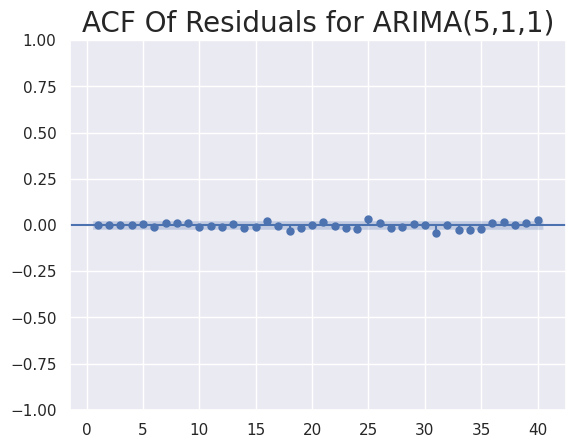

In [ ]:
df['res_ar_5_i_1_ma_1'] = results_ar_5_i_1_ma_1.resid
sgt.plot_acf(df['res_ar_5_i_1_ma_1'][1:], zero=False, lags=40)
plt.title("ACF Of Residuals for ARIMA(5,1,1)", size=20)
plt.show()


In [ ]:
df['delta_prices'] = df.market_value.diff(1)
model_delta_ar_1_i_1_ma_1 = ARIMA(df['delta_prices'][1:], order=(1,1,1))  # Asegúrate de utilizar (1,1,1) para reflejar la integración de primer orden
results_delta_ar_1_i_1_ma_1 = model_delta_ar_1_i_1_ma_1.fit()
results_delta_ar_1_i_1_ma_1.summary()


<ipython-input-51-4f9d85f6a6c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['delta_prices'] = df.market_value.diff(1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           delta_prices   No. Observations:                 6199
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -34031.610
Date:                Sun, 15 Oct 2023   AIC                          68069.220
Time:                        00:35:18   BIC                          68089.416
Sample:                    01-10-1994   HQIC                         68076.222
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0090      0.009     -1.011      0.312      -0.026       0.008
ma.L1         -1.0000      0.010   -102.178      0.000      -1.019      -0.981
sigma2      3436.5490     48.446     70.936      0.000    3341.597    3531.501
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3577.73
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                            -0.21
Prob(H) (two-sided):                  0.13   Kurtosis:                         6.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_test_result = adfuller(df['delta_prices'][1:])
print("ADF Test Results:")
print("ADF Statistic:", adf_test_result[0])
print("p-value:", adf_test_result[1])
print("Critical Values:", adf_test_result[4])


ADF Test Results:
ADF Statistic: -35.42231543819682
p-value: 0.0
Critical Values: {'1%': -3.431406355974594, '5%': -2.8620068149070077, '10%': -2.5670184827348006}


In [ ]:
model_ar_1_i_2_ma_1 = ARIMA(df.market_value, order=(1,2,1))
results_ar_1_i_2_ma_1 = model_ar_1_i_2_ma_1.fit()
results_ar_1_i_2_ma_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6200
Model:                 ARIMA(1, 2, 1)   Log Likelihood              -34031.607
Date:                Sun, 15 Oct 2023   AIC                          68069.214
Time:                        00:37:22   BIC                          68089.410
Sample:                    01-07-1994   HQIC                         68076.216
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0090      0.009     -1.011      0.312      -0.026       0.008
ma.L1         -1.0000      0.012    -85.838      0.000      -1.023      -0.977
sigma2      3436.5036     52.847     65.027      0.000    3332.925    3540.083
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3577.15
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                            -0.21
Prob(H) (two-sided):                  0.13   Kurtosis:                         6.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<ipython-input-55-072156f15b1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_ar_1_i_2_ma_1'] = results_ar_1_i_2_ma_1.resid


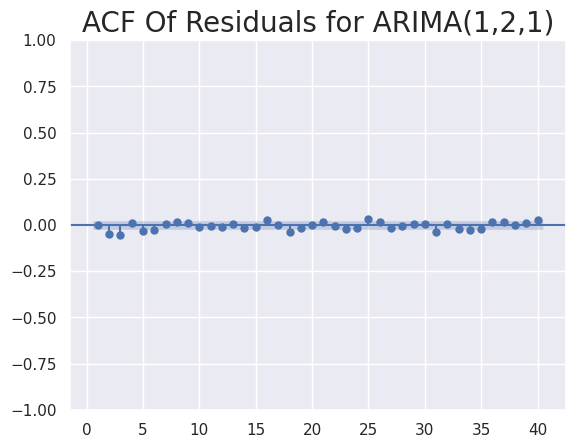

In [ ]:
df['res_ar_1_i_2_ma_1'] = results_ar_1_i_2_ma_1.resid
sgt.plot_acf(df['res_ar_1_i_2_ma_1'][2:], zero=False, lags=40)
plt.title("ACF Of Residuals for ARIMA(1,2,1)", size=20)
plt.show()


In [ ]:
model_ar_1_i_1_ma_1 = ARIMA(df.market_value, order=(1,1,1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
results_ar_1_i_1_ma_1.summary()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6200
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -34020.745
Date:                Sun, 15 Oct 2023   AIC                          68047.491
Time:                        03:00:19   BIC                          68067.687
Sample:                    01-07-1994   HQIC                         68054.493
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8293      0.042     19.867      0.000       0.748       0.911
ma.L1         -0.8644      0.037    -23.226      0.000      -0.937      -0.791
sigma2      3423.1174     36.794     93.035      0.000    3351.002    3495.232
===================================================================================
Ljung-Box (L1) (Q):                   2.89   Jarque-Bera (JB):              3628.96
Prob(Q):                              0.09   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                            -0.32
Prob(H) (two-sided):                  0.12   Kurtosis:                         6.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_sarimax = SARIMAX(df.market_value, order=(1,0,1), seasonal_order=(2,0,1,5))
results_sarimax = model_sarimax.fit()
results_sarimax.summary()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                      market_value   No. Observations:                 6200
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 5)   Log Likelihood              -34040.847
Date:                           Sun, 15 Oct 2023   AIC                          68093.694
Time:                                   03:02:05   BIC                          68134.087
Sample:                               01-07-1994   HQIC                         68107.698
                                    - 10-12-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9997      0.000   2986.817      0.000       0.999       1.000
ma.L1         -0.0090      0.003     -3.096      0.002      -0.015      -0.003
ar.S.L5        0.9655      0.008    114.056      0.000       0.949       0.982
ar.S.L10       0.0344      0.008      4.168      0.000       0.018       0.051
ma.S.L5       -0.9991      0.004   -267.460      0.000      -1.006      -0.992
sigma2      3425.5897     37.176     92.145      0.000    3352.726    3498.454
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              3562.07
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                            -0.22
Prob(H) (two-sided):                  0.12   Kurtosis:                         6.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""